In [61]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd
import scipy.stats as sc
import scipy.special as ss
import sympy as sp

Задача 3

Гусейнов Миран ФН11-53б Вариант 5

## Моделирование выборки из абсолютно непрерывного закона распределения методом обратных функций.

### Задание. 
1. Для данного n методом обратных функций смоделируйте выборку из закона распределения с заданной плотностью p(x).
2. Для полученной выборки найдите гистограмму относительных частот.  Постройте на одном рисунке графики теоретической плотности p(x) и гистограмму относительных частот.
3. Вычислите выборочное среднее и выборочную дисперсию и сравните с истинными значениями этих характеристик.
4. Используя неравенство Dvoretzky-Kiefer-Wolfowitz, постройте 90% доверительный интервал для функции распределения F(x).
Приведите графическую иллюстрацию

    Бэта-раcпределение B(3,2)     
    n = 170

### Решение 
#### 1. Для  n = 170 методом обратных функций смоделируем выборку из закона распределения с плотностью  B(3,2)  .

In [151]:
k=2.5
n=170

random_y=np.random.sample(n)
print('Вектор сдучайных велечин от 0 до 1 длиной 170')
pd.DataFrame([[round(i,4) for i in random_y]])

Вектор сдучайных велечин от 0 до 1 длиной 170


,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0.4358,0.0346,0.5558,0.9586,0.7413,0.2953,0.0335,0.1477,0.5804,0.3252,...,0.5076,0.16,0.4052,0.4784,0.3535,0.6933,0.8708,0.1759,0.2454,0.5743


Смоделируем выборку используя встроенуй обратную функцию Бэта-раcпределения

In [211]:
vyborka=[sc.beta.ppf(q = i,a = 3,b = 2) for i in random_y]
print("Полученая выборка из закона Бэта-раcпределение B(3,2)")
pd.DataFrame((np.reshape(vyborka,(17,10))),[" " for i in range(17)],[" " for i in range(10)])

Полученая выборка из закона Бэта-раcпределение B(3,2)


,,,,,,,,,,
,0.576957,0.217841,0.645940,0.911749,0.751770,0.488390,0.215389,0.371219,0.659790,0.508384
,0.180978,0.395284,0.256669,0.422039,0.471093,0.471958,0.514784,0.430040,0.782387,0.690243
,0.435311,0.830932,0.779397,0.473318,0.375320,0.310704,0.837915,0.732047,0.536972,0.222649
,0.691210,0.852598,0.601109,0.574505,0.897075,0.669266,0.568122,0.508250,0.902284,0.726087
,0.668642,0.422731,0.838362,0.338228,0.786713,0.742766,0.736294,0.748184,0.597927,0.242282
,0.344709,0.290318,0.664949,0.888782,0.653546,0.815682,0.906679,0.744274,0.703857,0.637980
,0.690098,0.541934,0.457795,0.757279,0.785173,0.644195,0.586195,0.459200,0.565335,0.842707
,0.668583,0.771328,0.662567,0.922513,0.296453,0.751373,0.679314,0.655231,0.863834,0.753512
,0.634164,0.934317,0.270547,0.397914,0.610175,0.896949,0.488487,0.612893,0.602844,0.770571
,0.208057,0.800589,0.373739,0.376440,0.451384,0.690325,0.877735,0.824545,0.566444,0.674453


#### 2. Для полученной выборки найдем гистограмму относительных частот.  Построем на одном рисунке графики теоретической плотности  и гистограмму относительных частот.

##### Найдем крайние члены вариационного ряда и размах выборки

In [174]:
print("Крайние члены вариационного ряда:")
print('max =', max(vyborka),'\nmin =',min(vyborka),'\n')

omega =max(vyborka)-min(vyborka)
print('Размах выборки:',round(omega,3))

Крайние члены вариационного ряда:
max = 0.9516455478442275 
min = 0.1603096337741723 

Размах выборки: 0.791


##### Осуществите группировку данных

In [175]:
l= math.trunc(1+math.log(120,2))
print('Количество интервалов найденых по правилу Стерджа:',l)

Количество интервалов найденых по правилу Стерджа: 7


In [176]:
print("Сгруппированые данные:")
interval = ['(' + str(round(i,3)) + " : " + str(round(i+ omega/l,3)) + ')' for i in out[1][:-1]]
display(pd.DataFrame([out[0]*(n*(omega/l)), [round(i,4) for i in out[0]]], index = ["частоты"," отн. частоты"], columns = interval ))

Сгруппированые данные:


,(0.16 : 0.273),(0.273 : 0.386),(0.386 : 0.499),(0.499 : 0.613),(0.613 : 0.726),(0.726 : 0.839),(0.839 : 0.952)
частоты,11.0000,23.0000,19.0000,28.000,36.0000,35.0000,18.0000
отн. частоты,0.5724,1.1968,0.9886,1.457,1.8732,1.8212,0.9366


##### По сгруппированным данным постройте гистограмму относительных частот

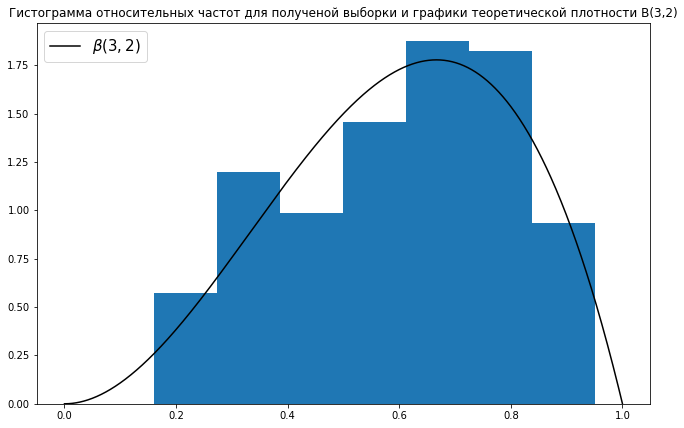

In [177]:
x2=np.linspace(0,1,1000)
plt.figure(figsize=(11,7))
plt.plot(x2,sc.beta.pdf(x2,a = 3,b = 2),'k',label = r'$\beta(3,2)$')
out = plt.hist(vyborka,7,density = True)
plt.legend(fontsize = 15 ,loc = 2)
plt.title("Гистограмма относительных частот для полученой выборки и графики теоретической плотности B(3,2)",fontsize = 12)
plt.show()

#### 3. Вычислим выборочное среднее и выборочную дисперсию и сравним с истинными значениями этих характеристик.

In [173]:
D = sc.beta.var(a = 3,b = 2)
M = sc.beta.mean(a = 3,b = 2)

M2=np.average(np.array(vyborka))
D2=np.average(np.array(vyborka)**2) - M2**2

pd.DataFrame([[M,round(M2,5),round(abs(M-M2),5)],[D,round(D2,5),round(abs(D/D2),5)]],["Матожидание","Дисперсия"],["Теоритическая","Эмпирическая","Разница"])

,Теоритическая,Эмпирическая,Разница
Матожидание,0.60,0.59714,0.00286
Дисперсия,0.04,0.03966,1.00867


### 4.Находим эмпирическую функцию распределения и строим доверительный [ L(z), R(z)] интервал  на основе неравенства Дворецкого-Кифера-Волфовица

#### Эмпирическая функция распределения 

In [178]:
def ind(x):
    if (x>0):
        return 1
    else :
        return 0
    
def F_emp(x):
    sum_array=[]
    for j in x:
        sum=0
        for i in vyborka:
            sum+=ind(j-i)/n
        sum_array.append(sum)
    return sum_array

#### Используя неравенство Dvoretzky-Kiefer-Wolfowitz, построем 90% доверительный интервал

In [205]:
eps=(-math.log(0.1/2)/(2*n))**(1/2)
print("\u03B5 =",eps)

def R_x(x):
    femp=F_emp(x)
    ret=[]
    for i in femp:
        if (i+eps<1):
            ret.append(i+eps)
        else:
            ret.append(1)
    return ret

def L_x(x):
    femp=F_emp(x)
    ret=[]
    for i in femp:
        if (i-eps>0):
            ret.append(i-eps)
        else:
            ret.append(0)
    return ret

ε = 0.09386680603471494


#### 5. Приводим графическую иллюстрацию

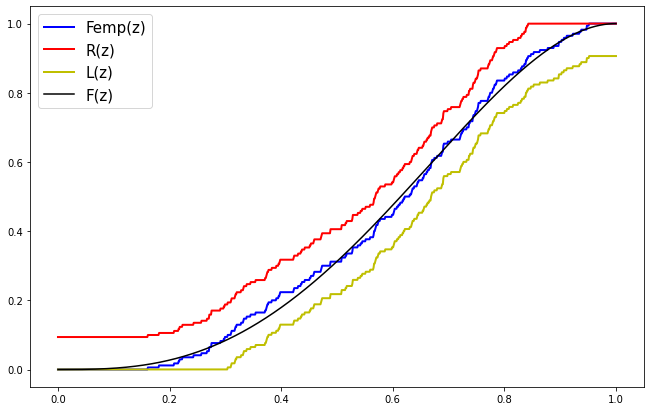

In [209]:
x=np.linspace(0,1,1000)
plt.figure(figsize=(11,7))
plt.plot(x,F_emp(x),'b',linewidth = 2, label = 'Femp(z)')
plt.plot(x,R_x(x),'r',linewidth = 2, label = 'R(z)')
plt.plot(x,L_x(x),'y',linewidth = 2, label = 'L(z)')
plt.plot(x,sc.beta.cdf(x,a = 3, b = 2),color = "black", label = 'F(z)')
plt.legend(fontsize = 15)

### Вывод: выборка смоделированая методом обратных функций подчиняется закону с плотностью распределения B(3,2)